In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\Lam\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Lam\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Lam\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:
restaurants_path = 'restaurant_inspections.csv'
establishments_path = 'restaurant_establishments.csv'
violations_path = 'restaurant_violations.csv'
categories_path = 'restaurant_categories.csv'
cities_path = 'restaurant_cities.csv'

In [5]:
cdf = pd.read_csv(cities_path, sep = ';', index_col = 0)
cdf.drop(cdf.columns[cdf.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#cdf.dropna(how='all', axis='columns')
c_dict = dict(cdf)

In [6]:
edf = pd.read_csv(establishments_path, sep=';', header=0)
edf.drop(edf.columns[edf.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
edf = edf[edf['current_grade'].notna()]


In [7]:
business_json_path = 'yelp_academic_dataset_business.json'
#review_json_path = 'yelp_academic_dataset_review.json'
bdf = pd.read_json(business_json_path, lines = True)
#rdf = pd.read_json(review_json_path, lines = True)

In [8]:
combined_df = bdf.merge(edf, how = 'inner', left_on = ['address', 'city'], right_on = ['address', 'city_name'])
combined_df = combined_df.dropna(how='all')
#combined_df.info()

In [9]:
combined_df.head(10)

,address,attributes,business_id,categories,city,hours,is_open,latitude_x,longitude_x,name,...,zip_code,nciaa,plan_review,record_status,current_grade,current_demerits,date_current,previous_grade,date_previous,search_text
0,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,...,89156-7801,Y,NaN,1,A,3.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S Pub PTS Pub
1,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,...,89156-7801,Y,NaN,1,A,6.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S to Go PTS to Go
2,6055 E Lake Mead Blvd,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",QWgGaMiZ7XxaJ6NMDCSthg,"New Mexican Cuisine, Restaurants",Las Vegas,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,36.195615,-115.040529,El Rey Del Machete,...,89156-7801,Y,NaN,1,A,3.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S Pub PTS Pub
3,6055 E Lake Mead Blvd,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",QWgGaMiZ7XxaJ6NMDCSthg,"New Mexican Cuisine, Restaurants",Las Vegas,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,36.195615,-115.040529,El Rey Del Machete,...,89156-7801,Y,NaN,1,A,6.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S to Go PTS to Go
4,6055 E Lake Mead Blvd,"{'RestaurantsPriceRange2': '2', 'OutdoorSeatin...",YoJt2bvCrYMSSyoeUO-YTg,"Sports Bars, Pubs, Nightlife, Bars, Restaurant...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.195615,-115.040529,PT's,...,89156-7801,Y,NaN,1,A,3.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S Pub PTS Pub
5,6055 E Lake Mead Blvd,"{'RestaurantsPriceRange2': '2', 'OutdoorSeatin...",YoJt2bvCrYMSSyoeUO-YTg,"Sports Bars, Pubs, Nightlife, Bars, Restaurant...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.195615,-115.040529,PT's,...,89156-7801,Y,NaN,1,A,6.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S to Go PTS to Go
6,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'RestaurantsReservatio...",TUpyKJFqL_ySZMo54pT-Sw,"Juice Bars & Smoothies, American (New), Food, ...",Las Vegas,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",1,36.195615,-115.040529,La Flor De Michoacan Restaurant,...,89156-7801,Y,NaN,1,A,3.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S Pub PTS Pub
7,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'RestaurantsReservatio...",TUpyKJFqL_ySZMo54pT-Sw,"Juice Bars & Smoothies, American (New), Food, ...",Las Vegas,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",1,36.195615,-115.040529,La Flor De Michoacan Restaurant,...,89156-7801,Y,NaN,1,A,6.0,2019-09-19 00:00:00,A,2019-09-19 00:00:00,PT'S to Go PTS to Go
8,8751 W Charleston Blvd,"{'ByAppointmentOnly': 'True', 'HairSpecializes...",5sFVttifV5ID8Gs0-iiAsA,"Hair Loss Centers, Beauty & Spas, Hair Stylist...",Las Vegas,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",1,36.157546,-115.286064,Hair by Sharyn,...,89117-5480,Y,NaN,2,A,7.0,2011-01-19 00:00:00,P,2010-04-15 00:00:00,Body Spa West - Snack Bar Body Spa West Snack...
9,8751 W Charleston Blvd,"{'AcceptsInsurance': 'False', 'BusinessAccepts...",h0ODf_rHyeKegIWuhQ7VMg,"Laser Hair Removal, Skin Care, Hair Removal, H...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '...",1,36.157546,-115.286074,Kivera Laser Spa,...,89117-5480,Y,NaN,2,A,7.0,2011-01-19 00:00:00,P,2010-04-15 00:00:00,Body Spa West - Snack Bar Body Spa West Snack...


In [10]:
DIR = 'C:/Users/Lam/Documents/DCS/Capstone 1 Projects/Yelp Inspection Project'
FILE = '/yelp_review.csv'

file = '{}{}'.format(DIR, FILE)

print('File directory: {}'.format(file))

File directory: C:/Users/Lam/Documents/DCS/Capstone 1 Projects/Yelp Inspection Project/yelp_review.csv


In [11]:
null_df = pd.DataFrame([])

for chunk in pd.read_csv(file, chunksize=100000):
    final_df = pd.merge(combined_df, chunk, how = 'inner', left_on = ['business_id'], right_on = ['business_id'])
    null_df = null_df.append(final_df, ignore_index=True)
    null_df.drop_duplicates(subset = "review_id", inplace=True)
    print(null_df.shape)
    #print(final_df.head())

(8651, 42)
(17600, 42)
(26300, 42)
(34954, 42)
(43673, 42)
(52140, 42)
(61095, 42)
(70004, 42)
(78866, 42)
(87791, 42)
(96274, 42)
(105423, 42)
(114497, 42)
(123567, 42)
(132522, 42)
(141670, 42)
(150433, 42)
(159239, 42)
(168462, 42)
(177372, 42)
(186132, 42)
(194668, 42)
(203347, 42)
(212541, 42)
(221267, 42)
(230073, 42)
(238554, 42)
(247105, 42)
(255886, 42)
(264588, 42)
(273371, 42)
(282188, 42)
(290609, 42)
(299202, 42)
(307612, 42)
(316499, 42)
(325295, 42)
(334368, 42)
(343333, 42)
(352160, 42)
(360990, 42)
(369535, 42)
(378271, 42)
(386549, 42)
(395373, 42)
(403985, 42)
(412575, 42)
(421617, 42)
(430382, 42)
(439163, 42)
(447518, 42)
(456019, 42)
(461358, 42)


In [12]:
null_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude_x', 'longitude_x', 'name', 'postal_code',
       'review_count', 'stars_x', 'state', 'permit_number', 'facility_id',
       'owner_id', 'PE', 'restaurant_name', 'location_name', 'latitude_y',
       'longitude_y', 'city_id', 'city_name', 'zip_code', 'nciaa',
       'plan_review', 'record_status', 'current_grade', 'current_demerits',
       'date_current', 'previous_grade', 'date_previous', 'search_text',
       'review_id', 'user_id', 'stars_y', 'date', 'text', 'useful', 'funny',
       'cool'],
      dtype='object')

In [28]:
shortened_columns = ['business_id', 'name', 'address', 'postal_code', 'current_grade', 'current_demerits', 'date_current','review_id','text','stars_y']

In [29]:
story_df = null_df[shortened_columns]
story_df['review length'] = story_df['text'].apply(len)

C:\Users\Lam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
story_df.head()

,business_id,name,address,postal_code,current_grade,current_demerits,date_current,review_id,text,stars_y,review length
0,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,pUpR94RE8Ld9FcmJ7ByxJg,Legit Mexican food from a small homey shop.\nW...,5,1328
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,FNKLKqez8KWqyWB_WJOjow,"México lindo y querido, si muero lejos de ti, ...",5,3471
2,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,8ILxnnktxFKSEXWcj_-6kg,By far the best Mexican Restaurant I've been t...,5,306
3,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,FeF7GfYMkY5pcvm81uh14g,Anyplace that serves margaritas in pint mugs i...,4,289
4,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,89156,A,3.0,2019-09-19 00:00:00,eYJWULNbAek-KrKdMnEMEg,We enjoy eating at this Mexican Restaurant a c...,4,518


Q: How does review length correlate with star ratings?

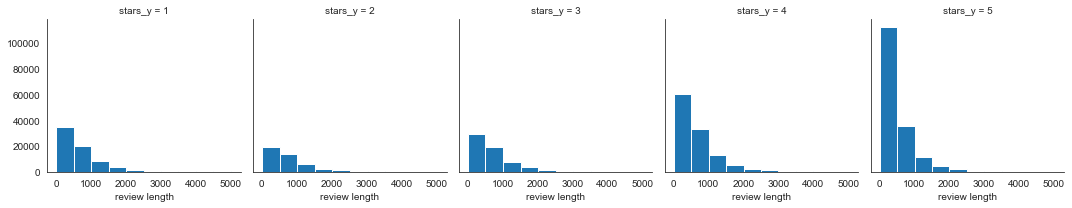

In [96]:
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(story_df, col='stars_y')
g.map(plt.hist, 'review length')

R: It appears that while there is an increase of reviews less than 1000 words in reviews with 4 and 5 stars, there does not appear to be a trend between review length and star ratings. I had assumed that there would be an increase in review length if the star rating was low or high as people would have more to say when emotions are involved. I can go through the reviews and see what words were used for each review that may tell us why the review lengths did not change much. 


Q: Does current demerits correlate with review length?

C:\Users\Lam\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Lam\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Lam\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lam\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lam\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lam\Anaconda3\lib\site-packages\IPyth

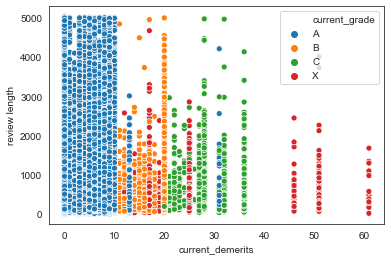

In [123]:
X = story_df['review length']
Y = story_df['current_demerits']


g = sns.scatterplot(y='review length', x='current_demerits',
                   hue='current_grade', data=story_df)
#g.set(xscale='log')
#plt.scatter(X,Y)
#plt.show()

R: As seen by this scatterplot, it seems that A grades tend to fall under 10 demerits, B from 10 to 20, C greater than 20 and X greater than 40. However, there seem to various outliers in the X grades as they are present in values under 30. This could be due to the notion that the ratings have not been updated in a while or they have failed inspection based on the violations they received. 

Q: Is there any relationship between review length and each grade?

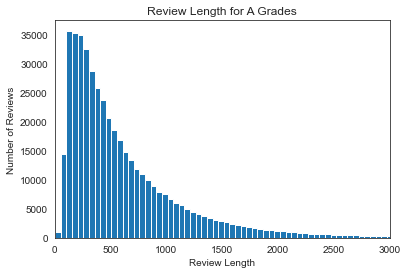

In [91]:
X = story_df['review length'].loc[story_df['current_grade'] == 'A']
plt.hist(X, bins=100)
plt.title('Review Length for A Grades')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.xlim(0,3000,50)
plt.show()

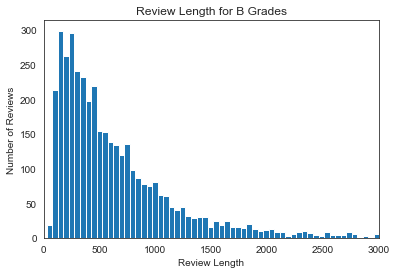

In [92]:
X = story_df['review length'].loc[story_df['current_grade'] == 'B']
plt.hist(X, bins=100)
plt.title('Review Length for B Grades')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

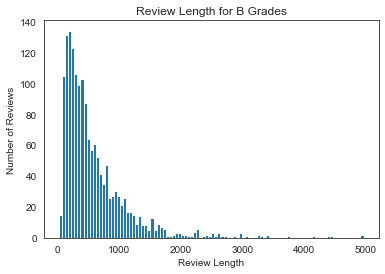

In [95]:
X = story_df['review length'].loc[story_df['current_grade'] == 'C']
plt.hist(X, bins=100)
plt.title('Review Length for B Grades')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

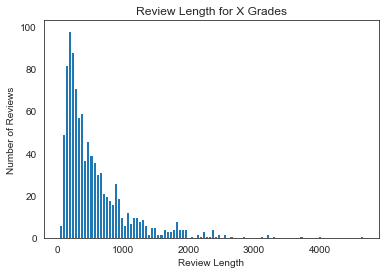

In [97]:
X = story_df['review length'].loc[story_df['current_grade'] == 'X']
plt.hist(X, bins=100)
plt.title('Review Length for X Grades')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

R: Looking at each letter grade's histogram, they all seem to have a similar shape of skewed to the right. There does not appear to be a correlation between review length and letter grades received. 

Q: What trends/relationships can you make to tell a compelling story?

R: As seen through the various graphs above, quantitative graphs don't seem to tell us much about the story of the data. It may be better to dig deeper and figure out the qualitative aspects of the text to tell us something about the grades or demerits. 